# IBM AMLSim Dataset - Exploratory Data Analysis
## Anti-Money Laundering Fraud Detection for Hackathon

This notebook explores the IBM AMLSim dataset to understand:
- Transaction patterns
- Account characteristics
- Fraud/Money laundering patterns
- Graph structure for GNN modeling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-whitegrid')

# Dataset path
DATA_PATH = Path('/Users/tanzeel.shaikh/.cache/kagglehub/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml/versions/8')
print('Available files:')
for f in sorted(DATA_PATH.glob('*')):
    size_mb = f.stat().st_size / (1024 * 1024)
    print(f'  {f.name}: {size_mb:.1f} MB')

## 1. Load the Small Dataset (HI - High Illicit Rate)
We'll use HI-Small for EDA as it has more fraud patterns to analyze

In [14]:
# Load transactions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

DATA_PATH = Path('data/ibm-transactions-for-anti-money-laundering-aml/versions/8')
trans_df = pd.read_csv( DATA_PATH / 'HI-Small_Trans.csv')
print(f'Transactions shape: {trans_df.shape}')
print(f'Memory usage: {trans_df.memory_usage(deep=True).sum() / 1024**2:.1f} MB')
trans_df.head()

Transactions shape: (5078345, 11)
Memory usage: 1891.0 MB


,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0


In [15]:
# Load accounts
accounts_df = pd.read_csv(DATA_PATH / 'HI-Small_accounts.csv')
print(f'Accounts shape: {accounts_df.shape}')
accounts_df.head()

Accounts shape: (518581, 5)


,Bank Name,Bank ID,Account Number,Entity ID,Entity Name
0,Portugal Bank #4507,331579,80B779D80,80062E240,Sole Proprietorship #50438
1,Canada Bank #27,210,809D86900,800C998A0,Corporation #33520
2,UK Bank #33,21884,80812BE00,800C47F50,Partnership #35397
3,Germany Bank #4815,32742,81047F300,80096F0B0,Corporation #48813
4,National Bank of Harrisburg,127390,80BD8CF00,800FB8760,Corporation #889


In [16]:
# Load patterns (fraud patterns)
with open(DATA_PATH / 'HI-Small_Patterns.txt', 'r') as f:
    patterns_raw = f.read()
print('First 2000 characters of patterns file:')
print(patterns_raw[:2000])

First 2000 characters of patterns file:
BEGIN LAUNDERING ATTEMPT - FAN-OUT:  Max 16-degree Fan-Out
2022/09/01 00:06,021174,800737690,012,80011F990,2848.96,Euro,2848.96,Euro,ACH,1
2022/09/01 04:33,021174,800737690,020,80020C5B0,8630.40,Euro,8630.40,Euro,ACH,1
2022/09/01 09:14,021174,800737690,020,80006A5E0,35642.49,Yuan,35642.49,Yuan,ACH,1
2022/09/01 09:56,021174,800737690,00220,8007A5B70,5738987.96,US Dollar,5738987.96,US Dollar,ACH,1
2022/09/01 11:28,021174,800737690,001244,80093C0D0,7254.53,US Dollar,7254.53,US Dollar,ACH,1
2022/09/01 13:13,021174,800737690,00513,80078E200,6990.87,US Dollar,6990.87,US Dollar,ACH,1
2022/09/01 14:11,021174,800737690,020,80066B990,12536.92,Euro,12536.92,Euro,ACH,1
2022/09/02 15:40,021174,800737690,00410,8002CC310,3511.82,Euro,3511.82,Euro,ACH,1
2022/09/02 21:23,021174,800737690,01292,8004030A0,16135.09,US Dollar,16135.09,US Dollar,ACH,1
2022/09/02 23:10,021174,800737690,01601,800578800,12183.28,US Dollar,12183.28,US Dollar,ACH,1
2022/09/03 09:29,021174,

## 2. Transaction Data Analysis

In [17]:
# Basic info about transactions
print('Transaction DataFrame Info:')
print('='*50)
trans_df.info()
print('\nColumn names:', trans_df.columns.tolist())

Transaction DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 426.2+ MB

Column names: ['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1', 'Amount Received', 'Receiving Currency', 'Amount Paid', 'Payment Currency', 'Payment Format', 'Is Laundering']


In [18]:
# Statistical summary
trans_df.describe()

,From Bank,To Bank,Amount Received,Amount Paid,Is Laundering
count,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06
mean,4.573057e+04,6.574456e+04,5.988726e+06,4.509273e+06,1.019427e-03
std,8.176562e+04,8.409299e+04,1.037183e+09,8.697728e+08,3.191219e-02
min,1.000000e+00,1.000000e+00,1.000000e-06,1.000000e-06,0.000000e+00
25%,1.190000e+02,4.259000e+03,1.833700e+02,1.844800e+02,0.000000e+00
50%,9.679000e+03,2.156800e+04,1.411010e+03,1.414540e+03,0.000000e+00
75%,2.862800e+04,1.223320e+05,1.234627e+04,1.229784e+04,0.000000e+00
max,3.563030e+05,3.562940e+05,1.046302e+12,1.046302e+12,1.000000e+00


In [19]:
# Check for fraud label column
print('Checking for fraud/illicit labels...')
for col in trans_df.columns:
    print(f'{col}: {trans_df[col].dtype} | unique: {trans_df[col].nunique()} | sample: {trans_df[col].iloc[0]}')

Checking for fraud/illicit labels...
Timestamp: object | unique: 15018 | sample: 2022/09/01 00:20
From Bank: int64 | unique: 30470 | sample: 10
Account: object | unique: 496995 | sample: 8000EBD30
To Bank: int64 | unique: 15811 | sample: 10
Account.1: object | unique: 420636 | sample: 8000EBD30
Amount Received: float64 | unique: 915161 | sample: 3697.34
Receiving Currency: object | unique: 15 | sample: US Dollar
Amount Paid: float64 | unique: 923873 | sample: 3697.34
Payment Currency: object | unique: 15 | sample: US Dollar
Payment Format: object | unique: 7 | sample: Reinvestment
Is Laundering: int64 | unique: 2 | sample: 0


In [20]:
# Check if there's an 'Is Laundering' column or similar
fraud_cols = [col for col in trans_df.columns if 'launder' in col.lower() or 'fraud' in col.lower() or 'illicit' in col.lower() or 'flag' in col.lower()]
print(f'Potential fraud indicator columns: {fraud_cols}')

# If 'Is Laundering' exists, show distribution
if 'Is Laundering' in trans_df.columns:
    print('\nFraud Label Distribution:')
    print(trans_df['Is Laundering'].value_counts())
    print(f'\nFraud Rate: {trans_df["Is Laundering"].mean()*100:.2f}%')

Potential fraud indicator columns: ['Is Laundering']

Fraud Label Distribution:
Is Laundering
0    5073168
1       5177
Name: count, dtype: int64

Fraud Rate: 0.10%


Amount Received


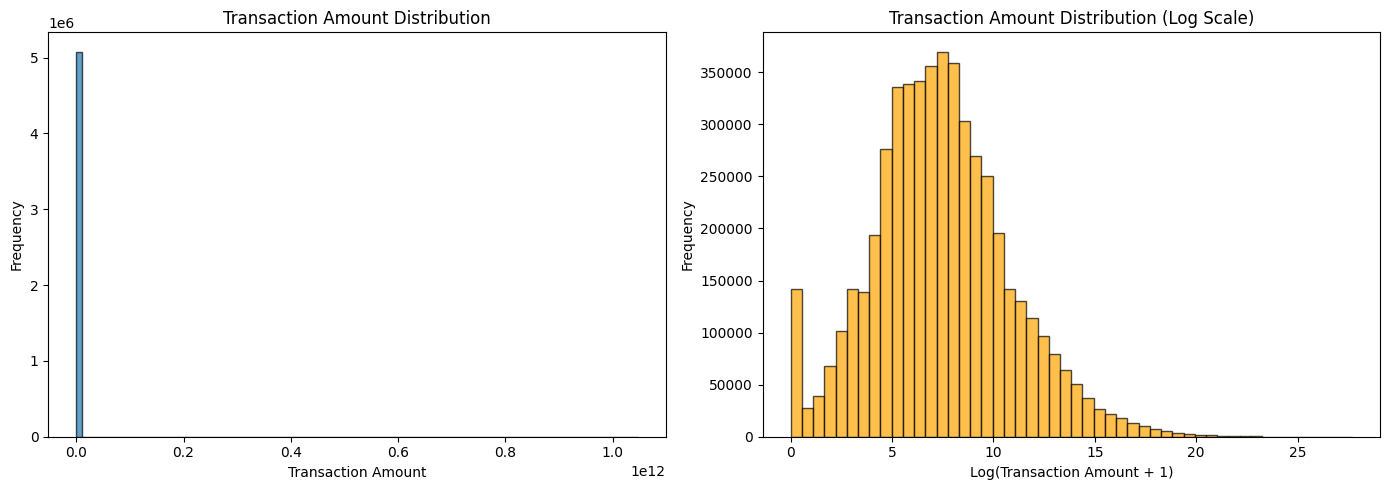

In [21]:
# Transaction amount distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Find the amount column (might be named differently)
amount_col = [col for col in trans_df.columns if 'amount' in col.lower()]
if amount_col:
    amount_col = amount_col[0]
    
    print(amount_col)
    # Raw distribution
    axes[0].hist(trans_df[amount_col], bins=100, edgecolor='black', alpha=0.7)
    axes[0].set_xlabel('Transaction Amount')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Transaction Amount Distribution')
    
    # Log scale
    axes[1].hist(np.log1p(trans_df[amount_col]), bins=50, edgecolor='black', alpha=0.7, color='orange')
    axes[1].set_xlabel('Log(Transaction Amount + 1)')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Transaction Amount Distribution (Log Scale)')

plt.tight_layout()
plt.show()

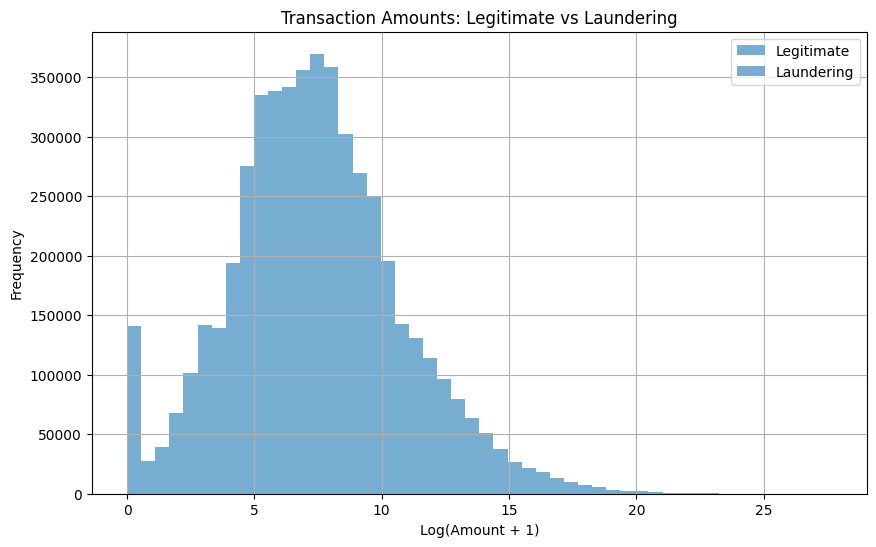

Amount Statistics by Label:
                   count          mean           std       min      25%  \
Is Laundering                                                             
0              5073168.0  5.957962e+06  1.036563e+09  0.000001   183.07   
1                 5177.0  3.613531e+07  1.527919e+09  0.003227  2634.97   

                   50%       75%           max  
Is Laundering                                   
0              1407.51  12322.51  1.046302e+12  
1              8667.21  18832.27  8.485314e+10  


In [22]:
# If fraud label exists, compare amounts
if 'Is Laundering' in trans_df.columns and amount_col:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    trans_df.groupby('Is Laundering')[amount_col].apply(lambda x: np.log1p(x)).hist(
        bins=50, alpha=0.6, ax=ax, label=['Legitimate', 'Laundering']
    )
    ax.set_xlabel('Log(Amount + 1)')
    ax.set_ylabel('Frequency')
    ax.set_title('Transaction Amounts: Legitimate vs Laundering')
    ax.legend(['Legitimate', 'Laundering'])
    plt.show()
    
    # Stats comparison
    print('Amount Statistics by Label:')
    print(trans_df.groupby('Is Laundering')[amount_col].describe())

## 3. Account Data Analysis

In [23]:
# Account info
print('Account DataFrame Info:')
print('='*50)
accounts_df.info()
print('\nColumn names:', accounts_df.columns.tolist())

Account DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518581 entries, 0 to 518580
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Bank Name       518581 non-null  object
 1   Bank ID         518581 non-null  int64 
 2   Account Number  518581 non-null  object
 3   Entity ID       518581 non-null  object
 4   Entity Name     518581 non-null  object
dtypes: int64(1), object(4)
memory usage: 19.8+ MB

Column names: ['Bank Name', 'Bank ID', 'Account Number', 'Entity ID', 'Entity Name']


In [24]:
# Account details
print('\nAccount data sample:')
accounts_df.head(10)


Account data sample:


,Bank Name,Bank ID,Account Number,Entity ID,Entity Name
0,Portugal Bank #4507,331579,80B779D80,80062E240,Sole Proprietorship #50438
1,Canada Bank #27,210,809D86900,800C998A0,Corporation #33520
2,UK Bank #33,21884,80812BE00,800C47F50,Partnership #35397
3,Germany Bank #4815,32742,81047F300,80096F0B0,Corporation #48813
4,National Bank of Harrisburg,127390,80BD8CF00,800FB8760,Corporation #889
5,Spain Bank #439,224555,80F269580,80064EB20,Sole Proprietorship #42987
6,Savings Bank of Omaha,32013,80E6E8680,800CCEDE0,Sole Proprietorship #20855
7,Brazil Bank #39,335355,80CDEFD80,800D88F10,Partnership #36822
8,Mexico Bank #16,1132,80B723600,800D3F760,Partnership #36511
9,Russia Bank #39,217824,806B17000,800B44480,Partnership #33830


In [25]:
# Check for account types or flags
for col in accounts_df.columns:
    print(f'{col}: {accounts_df[col].dtype} | unique: {accounts_df[col].nunique()}')
    if accounts_df[col].nunique() < 20:
        print(f'  Values: {accounts_df[col].value_counts().to_dict()}')

Bank Name: object | unique: 20053
Bank ID: int64 | unique: 30470
Account Number: object | unique: 518573
Entity ID: object | unique: 166207
Entity Name: object | unique: 166207


## 4. Graph Structure Analysis
Understanding the transaction network for GNN modeling

In [26]:
# Identify source and destination columns
print('Looking for source/destination account columns...')
src_cols = [col for col in trans_df.columns if 'from' in col.lower() or 'source' in col.lower() or 'orig' in col.lower()]
dst_cols = [col for col in trans_df.columns if 'to' in col.lower() or 'dest' in col.lower() or 'benef' in col.lower()]
print(f'Potential source columns: {src_cols}')
print(f'Potential destination columns: {dst_cols}')

Looking for source/destination account columns...
Potential source columns: ['From Bank']
Potential destination columns: ['To Bank']


In [27]:
# Graph statistics
if src_cols and dst_cols:
    src_col = src_cols[0]
    dst_col = dst_cols[0]
    
    unique_sources = trans_df[src_col].nunique()
    unique_dests = trans_df[dst_col].nunique()
    all_accounts = pd.concat([trans_df[src_col], trans_df[dst_col]]).nunique()
    
    print(f'Graph Statistics:')
    print(f'  Unique source accounts: {unique_sources:,}')
    print(f'  Unique destination accounts: {unique_dests:,}')
    print(f'  Total unique accounts (nodes): {all_accounts:,}')
    print(f'  Total transactions (edges): {len(trans_df):,}')
    print(f'  Avg edges per node: {len(trans_df) / all_accounts:.2f}')

Graph Statistics:
  Unique source accounts: 30,470
  Unique destination accounts: 15,811
  Total unique accounts (nodes): 30,470
  Total transactions (edges): 5,078,345
  Avg edges per node: 166.67


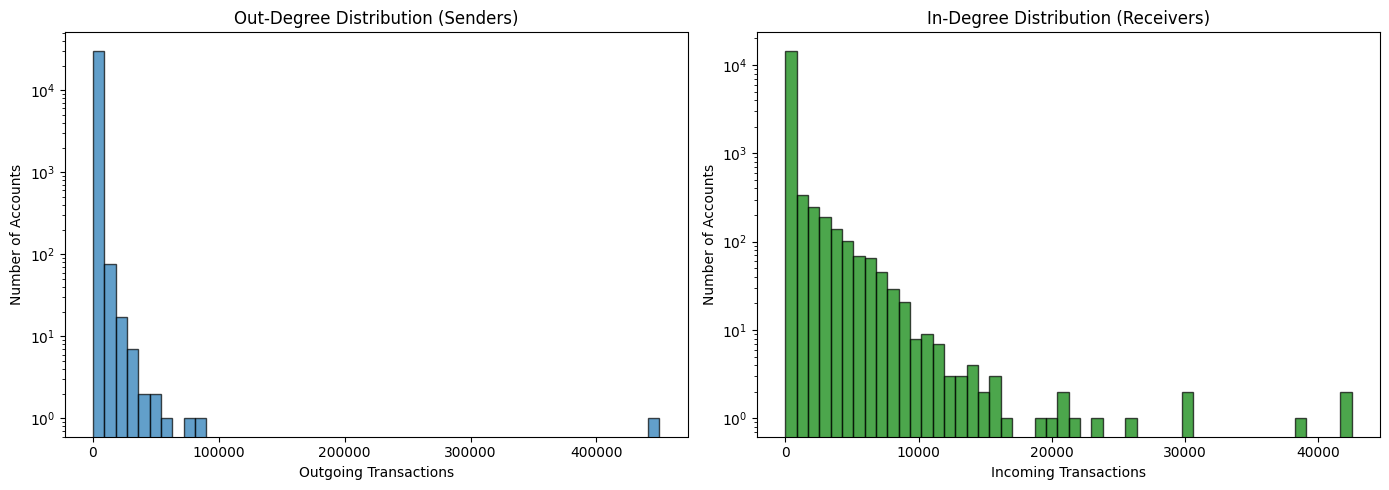


Top 10 Senders (potential fan-out):
From Bank
70     449859
10      81629
12      79754
1       62211
15      52511
220     52417
20      41008
3       38413
7       31086
211     30451
Name: count, dtype: int64

Top 10 Receivers (potential fan-in):
To Bank
10     42547
12     41872
15     38721
220    30625
1      30115
3      25627
7      23029
20     22048
28     21160
211    20576
Name: count, dtype: int64


In [28]:
# Degree distribution (number of transactions per account)
if src_cols and dst_cols:
    src_col = src_cols[0]
    dst_col = dst_cols[0]
    
    out_degree = trans_df[src_col].value_counts()
    in_degree = trans_df[dst_col].value_counts()
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].hist(out_degree.values, bins=50, edgecolor='black', alpha=0.7)
    axes[0].set_xlabel('Outgoing Transactions')
    axes[0].set_ylabel('Number of Accounts')
    axes[0].set_title('Out-Degree Distribution (Senders)')
    axes[0].set_yscale('log')
    
    axes[1].hist(in_degree.values, bins=50, edgecolor='black', alpha=0.7, color='green')
    axes[1].set_xlabel('Incoming Transactions')
    axes[1].set_ylabel('Number of Accounts')
    axes[1].set_title('In-Degree Distribution (Receivers)')
    axes[1].set_yscale('log')
    
    plt.tight_layout()
    plt.show()
    
    print(f'\nTop 10 Senders (potential fan-out):')
    print(out_degree.head(10))
    print(f'\nTop 10 Receivers (potential fan-in):')
    print(in_degree.head(10))

## 5. Temporal Analysis
Understanding time patterns for temporal GNN

In [29]:
# Check for timestamp columns
time_cols = [col for col in trans_df.columns if 'time' in col.lower() or 'date' in col.lower() or 'stamp' in col.lower()]
print(f'Time-related columns: {time_cols}')

# Also check for step/day columns (common in simulated data)
step_cols = [col for col in trans_df.columns if 'step' in col.lower() or 'day' in col.lower()]
print(f'Step/Day columns: {step_cols}')

Time-related columns: ['Timestamp']
Step/Day columns: []


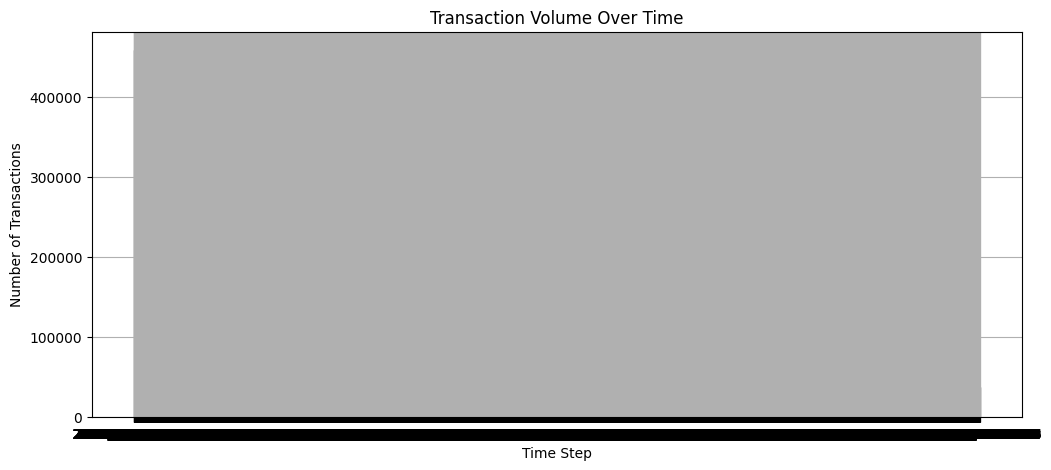

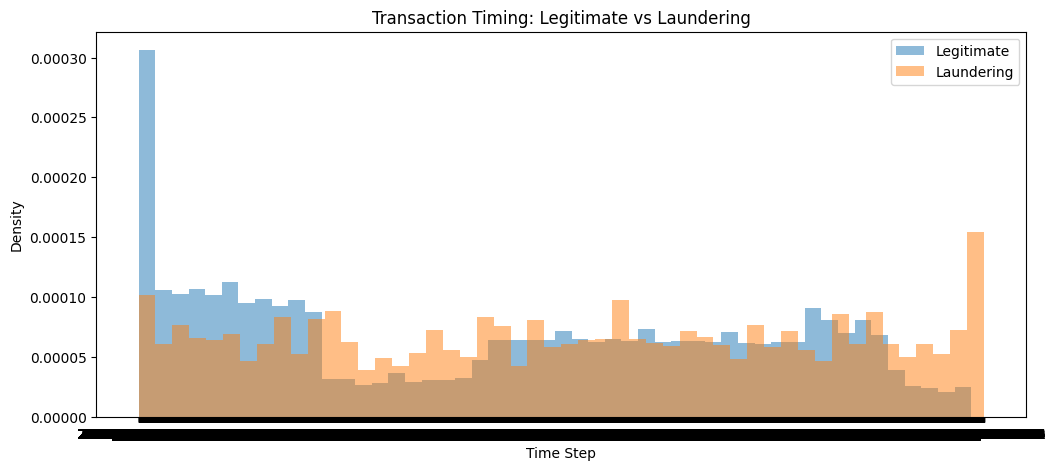

In [30]:
# Temporal distribution
if time_cols or step_cols:
    time_col = (time_cols + step_cols)[0]
    
    fig, ax = plt.subplots(figsize=(12, 5))
    trans_df[time_col].hist(bins=50, ax=ax, edgecolor='black', alpha=0.7)
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Number of Transactions')
    ax.set_title('Transaction Volume Over Time')
    plt.show()
    
    # If fraud label exists, compare
    if 'Is Laundering' in trans_df.columns:
        fig, ax = plt.subplots(figsize=(12, 5))
        
        legit = trans_df[trans_df['Is Laundering'] == 0][time_col]
        fraud = trans_df[trans_df['Is Laundering'] == 1][time_col]
        
        ax.hist(legit, bins=50, alpha=0.5, label='Legitimate', density=True)
        ax.hist(fraud, bins=50, alpha=0.5, label='Laundering', density=True)
        ax.set_xlabel('Time Step')
        ax.set_ylabel('Density')
        ax.set_title('Transaction Timing: Legitimate vs Laundering')
        ax.legend()
        plt.show()

## 6. Fraud Pattern Analysis
Analyzing the labeled money laundering patterns

In [31]:
# Parse patterns file
# The patterns file typically contains information about fraud schemes
patterns_lines = patterns_raw.strip().split('\n')
print(f'Total pattern entries: {len(patterns_lines)}')
print('\nFirst 10 pattern entries:')
for line in patterns_lines[:10]:
    print(line)

Total pattern entries: 4318

First 10 pattern entries:
BEGIN LAUNDERING ATTEMPT - FAN-OUT:  Max 16-degree Fan-Out
2022/09/01 00:06,021174,800737690,012,80011F990,2848.96,Euro,2848.96,Euro,ACH,1
2022/09/01 04:33,021174,800737690,020,80020C5B0,8630.40,Euro,8630.40,Euro,ACH,1
2022/09/01 09:14,021174,800737690,020,80006A5E0,35642.49,Yuan,35642.49,Yuan,ACH,1
2022/09/01 09:56,021174,800737690,00220,8007A5B70,5738987.96,US Dollar,5738987.96,US Dollar,ACH,1
2022/09/01 11:28,021174,800737690,001244,80093C0D0,7254.53,US Dollar,7254.53,US Dollar,ACH,1
2022/09/01 13:13,021174,800737690,00513,80078E200,6990.87,US Dollar,6990.87,US Dollar,ACH,1
2022/09/01 14:11,021174,800737690,020,80066B990,12536.92,Euro,12536.92,Euro,ACH,1
2022/09/02 15:40,021174,800737690,00410,8002CC310,3511.82,Euro,3511.82,Euro,ACH,1
2022/09/02 21:23,021174,800737690,01292,8004030A0,16135.09,US Dollar,16135.09,US Dollar,ACH,1


In [32]:
# Try to parse patterns as CSV if applicable
try:
    patterns_df = pd.read_csv(DATA_PATH / 'HI-Small_Patterns.txt')
    print('Patterns loaded as DataFrame:')
    print(f'Shape: {patterns_df.shape}')
    print(f'Columns: {patterns_df.columns.tolist()}')
    patterns_df.head(10)
except:
    print('Patterns file is not in CSV format, showing raw content above')

Patterns loaded as DataFrame:
Shape: (3948, 1)
Columns: ['BEGIN LAUNDERING ATTEMPT - FAN-OUT:  Max 16-degree Fan-Out']


In [33]:
# If we have fraud labels, analyze fraud transactions
if 'Is Laundering' in trans_df.columns:
    fraud_trans = trans_df[trans_df['Is Laundering'] == 1]
    print(f'Total fraudulent transactions: {len(fraud_trans):,}')
    
    if src_cols and dst_cols:
        src_col = src_cols[0]
        dst_col = dst_cols[0]
        
        # Accounts involved in fraud
        fraud_sources = fraud_trans[src_col].unique()
        fraud_dests = fraud_trans[dst_col].unique()
        fraud_accounts = set(fraud_sources) | set(fraud_dests)
        
        print(f'Accounts involved in laundering:')
        print(f'  As sender: {len(fraud_sources):,}')
        print(f'  As receiver: {len(fraud_dests):,}')
        print(f'  Total unique: {len(fraud_accounts):,}')

Total fraudulent transactions: 5,177
Accounts involved in laundering:
  As sender: 1,021
  As receiver: 1,105
  Total unique: 1,264


In [34]:
# Analyze transaction types if available
type_cols = [col for col in trans_df.columns if 'type' in col.lower() or 'payment' in col.lower()]
print(f'Transaction type columns: {type_cols}')

if type_cols:
    type_col = type_cols[0]
    print(f'\nTransaction types distribution:')
    print(trans_df[type_col].value_counts())
    
    if 'Is Laundering' in trans_df.columns:
        print(f'\nFraud rate by transaction type:')
        fraud_by_type = trans_df.groupby(type_col)['Is Laundering'].agg(['sum', 'count', 'mean'])
        fraud_by_type.columns = ['Fraud Count', 'Total', 'Fraud Rate']
        print(fraud_by_type.sort_values('Fraud Rate', ascending=False))

Transaction type columns: ['Payment Currency', 'Payment Format']

Transaction types distribution:
Payment Currency
US Dollar            1895172
Euro                 1168297
Swiss Franc           234860
Yuan                  213752
Shekel                192184
Rupee                 190202
UK Pound              180738
Yen                   155209
Ruble                 155178
Bitcoin               146066
Canadian Dollar       140042
Australian Dollar     136769
Mexican Peso          110159
Saudi Riyal            89014
Brazil Real            70703
Name: count, dtype: int64

Fraud rate by transaction type:
                   Fraud Count    Total  Fraud Rate
Payment Currency                                   
Saudi Riyal                374    89014    0.004202
Euro                      1372  1168297    0.001174
US Dollar                 1912  1895172    0.001009
Yen                        155   155209    0.000999
Australian Dollar          127   136769    0.000929
Canadian Dollar            

## 7. Network Visualization (Sample)
Visualizing a small sample of the transaction network

In [35]:
# Install networkx if needed
try:
    import networkx as nx
except ImportError:
    !pip install networkx
    import networkx as nx

print('NetworkX version:', nx.__version__)

NetworkX version: 3.6.1


Sample fraud network:
  Nodes: 206
  Edges: 194


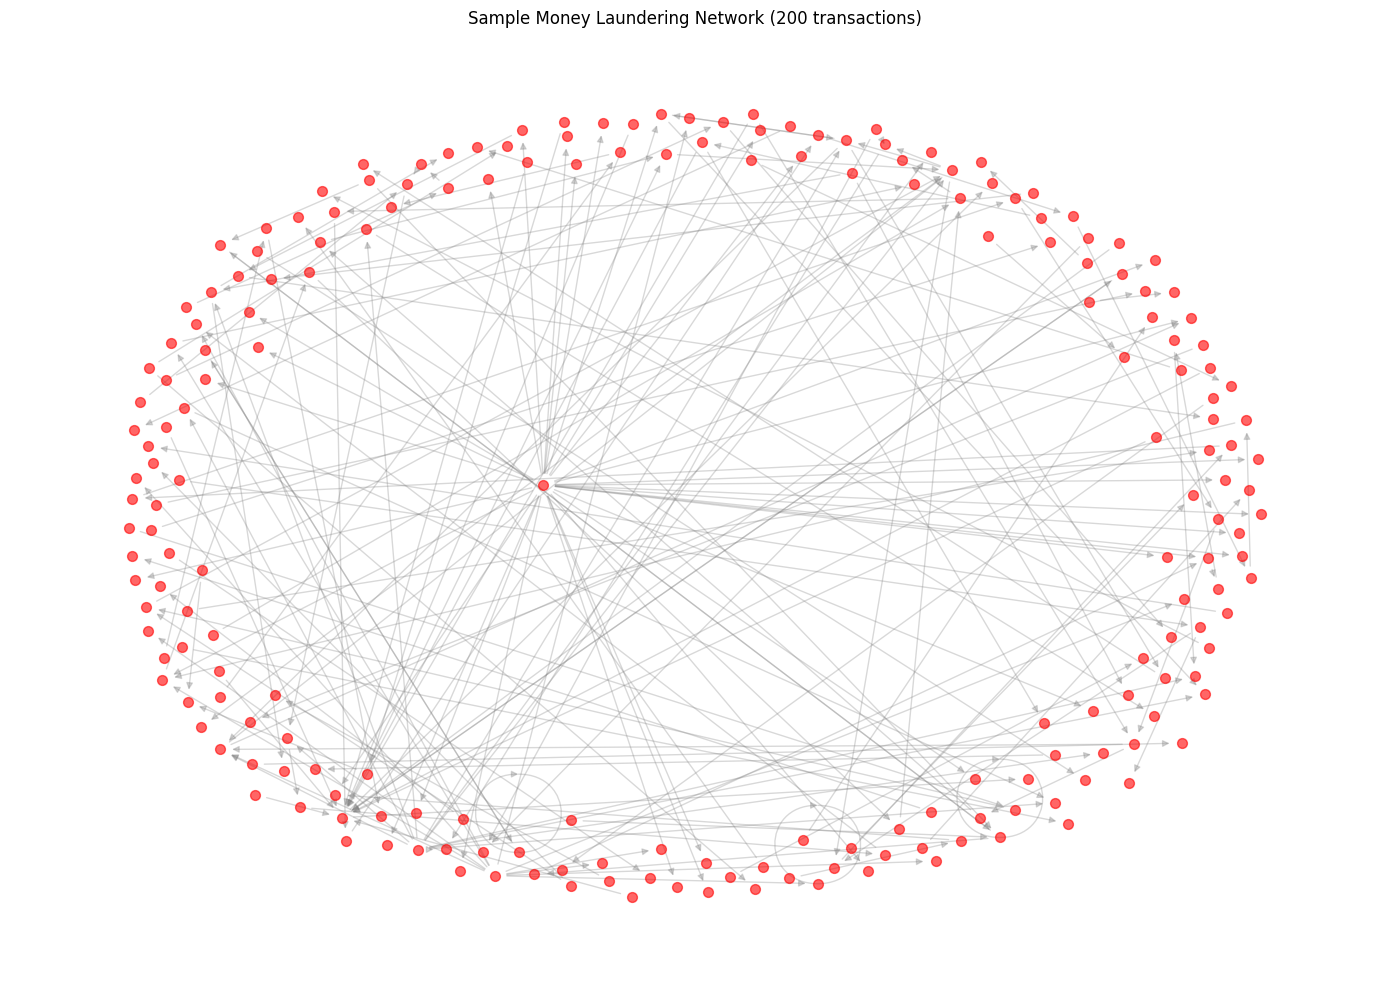

In [36]:
# Create a sample subgraph from fraud transactions
if 'Is Laundering' in trans_df.columns and src_cols and dst_cols:
    src_col = src_cols[0]
    dst_col = dst_cols[0]
    
    # Take a sample of fraud transactions
    fraud_sample = trans_df[trans_df['Is Laundering'] == 1].head(200)
    
    # Create graph
    G = nx.from_pandas_edgelist(
        fraud_sample,
        source=src_col,
        target=dst_col,
        create_using=nx.DiGraph()
    )
    
    print(f'Sample fraud network:')
    print(f'  Nodes: {G.number_of_nodes()}')
    print(f'  Edges: {G.number_of_edges()}')
    
    # Visualize
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(G, k=2, iterations=50)
    
    nx.draw_networkx_nodes(G, pos, node_size=50, node_color='red', alpha=0.6)
    nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.3, arrows=True, arrowsize=10)
    
    plt.title('Sample Money Laundering Network (200 transactions)')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [37]:
# Find connected components (potential fraud rings)
if 'G' in dir():
    # Convert to undirected for component analysis
    G_undirected = G.to_undirected()
    components = list(nx.connected_components(G_undirected))
    
    print(f'Connected components (potential fraud rings): {len(components)}')
    component_sizes = [len(c) for c in components]
    print(f'Component sizes: min={min(component_sizes)}, max={max(component_sizes)}, mean={np.mean(component_sizes):.1f}')
    
    # Show largest component
    largest_component = max(components, key=len)
    print(f'\nLargest component has {len(largest_component)} accounts')

Connected components (potential fraud rings): 34
Component sizes: min=2, max=134, mean=6.1

Largest component has 134 accounts


## 8. Summary Statistics for Kumo.ai
Key insights for building the GNN model

In [38]:
# Summary for Kumo.ai implementation
print('='*60)
print('DATASET SUMMARY FOR KUMO.AI GNN IMPLEMENTATION')
print('='*60)

print(f'\n1. NODES (Accounts):')
print(f'   Total accounts: {len(accounts_df):,}')

if src_cols and dst_cols:
    src_col = src_cols[0]
    dst_col = dst_cols[0]
    active_accounts = pd.concat([trans_df[src_col], trans_df[dst_col]]).nunique()
    print(f'   Active in transactions: {active_accounts:,}')

print(f'\n2. EDGES (Transactions):')
print(f'   Total transactions: {len(trans_df):,}')
if 'Is Laundering' in trans_df.columns:
    print(f'   Fraudulent: {trans_df["Is Laundering"].sum():,} ({trans_df["Is Laundering"].mean()*100:.2f}%)')
    print(f'   Legitimate: {(trans_df["Is Laundering"]==0).sum():,}')

print(f'\n3. KEY COLUMNS FOR KUMO:')
print(f'   Source account: {src_cols}')
print(f'   Destination account: {dst_cols}')
print(f'   Amount: {amount_col if "amount_col" in dir() else "TBD"}')
print(f'   Timestamp: {time_cols + step_cols}')
print(f'   Target label: "Is Laundering"')

print(f'\n4. GRAPH CHARACTERISTICS:')
if src_cols and dst_cols:
    print(f'   Graph type: Directed (money flows from source to destination)')
    print(f'   Temporal: Yes (transactions have timestamps)')
    print(f'   Multi-edge: Likely (same accounts can transact multiple times)')

DATASET SUMMARY FOR KUMO.AI GNN IMPLEMENTATION

1. NODES (Accounts):
   Total accounts: 518,581
   Active in transactions: 30,470

2. EDGES (Transactions):
   Total transactions: 5,078,345
   Fraudulent: 5,177 (0.10%)
   Legitimate: 5,073,168

3. KEY COLUMNS FOR KUMO:
   Source account: ['From Bank']
   Destination account: ['To Bank']
   Amount: Amount Received
   Timestamp: ['Timestamp']
   Target label: "Is Laundering"

4. GRAPH CHARACTERISTICS:
   Graph type: Directed (money flows from source to destination)
   Temporal: Yes (transactions have timestamps)
   Multi-edge: Likely (same accounts can transact multiple times)


In [39]:
# Next steps
print('\nNEXT STEPS FOR HACKATHON:')
print('-' * 40)
print('1. Connect this data to Kumo.ai')
print('2. Define graph schema: Account -> [transacts_with] -> Account')
print('3. Create predictive query: PREDICT Is_Laundering IN transactions')
print('4. Extract embeddings for fraud ring visualization')
print('5. Build LLM copilot for case summarization')


NEXT STEPS FOR HACKATHON:
----------------------------------------
1. Connect this data to Kumo.ai
2. Define graph schema: Account -> [transacts_with] -> Account
3. Create predictive query: PREDICT Is_Laundering IN transactions
4. Extract embeddings for fraud ring visualization
5. Build LLM copilot for case summarization
